# 集計

- https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a

In [1]:
import pandas as pd

filename = "raw_data/lunch_box.csv"
df = pd.read_csv(filename)

[データカラムの説明](https://qiita.com/ysdyt/items/9ccca82fc5b504e7913a)

In [2]:
df

datetime    y week  soldout          name   kcal          remarks  \
0    2013-11-18   90    月        0      厚切りイカフライ    NaN              NaN   
1    2013-11-19  101    火        1       手作りヒレカツ    NaN              NaN   
2    2013-11-20  118    水        0    白身魚唐揚げ野菜あん    NaN              NaN   
3    2013-11-21  120    木        1        若鶏ピリ辛焼    NaN              NaN   
4    2013-11-22  130    金        1      ビッグメンチカツ    NaN              NaN   
..          ...  ...  ...      ...           ...    ...              ...   
202   2014-9-24   59    水        1   白身魚のマスタード焼き  408.0              NaN   
203   2014-9-25   50    木        0       牛カルビ焼き肉  394.0              NaN   
204   2014-9-26   45    金        0      ランチビュッフェ    NaN  スペシャルメニュー（800円）   
205   2014-9-29   56    月        1      豚肉と玉子の炒め  404.0              NaN   
206   2014-9-30   40    火        0  鶏肉とカシューナッツ炒め  398.0              NaN   

             event  payday weather precipitation  temperature  
0              NaN     NaN      快晴            --         19.8  
1              NaN     NaN      快晴            --         17.0  
2              NaN     NaN      快晴            --         15.5  
3              NaN     NaN      快晴            --         15.2  
4              NaN     NaN      快晴            --         16.1  
..             ...     ...     ...           ...          ...  
202            NaN     NaN       曇             0         24.8  
203            NaN     NaN       曇             0         25.4  
204  キャリアアップ支援セミナー     NaN      晴れ            --         27.1  
205            NaN     NaN      快晴            --         26.6  
206            NaN     NaN      快晴            --         28.1  

[207 rows x 12 columns]

### 前処理(飛ばして OK)

In [3]:
df.set_index('datetime', inplace=True)
df.rename(columns={'y': 'sales'}, inplace=True)
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
df['month'] = list(pd.Series(df.index).apply(lambda x: x.month))
df['day'] = list(pd.Series(df.index).apply(lambda x: x.day))
labels = ['上旬', '中旬', '下旬']
df['period'] = pd.cut(list(df['day']),  bins=[0,10,20,31], labels=labels, right=True) # 0<day≦10, 10<day≦20, 20<day≦31
df.fillna(value={'payday': 0.0}, inplace=True)
df.dropna(subset=['kcal'], axis=0, inplace=True)
df['precipitation'] = df['precipitation'].str.replace('--', '0').astype(float)
df.drop(['remarks'], axis=1, inplace=True)

In [5]:
df

sales week  soldout          name   kcal event  payday weather  \
datetime                                                                     
2014-01-07    131    火        0  カレー入りソーセージカツ  404.0   NaN     0.0      快晴   
2014-01-08    128    水        0        豚肉の生姜焼  462.0   NaN     0.0       曇   
2014-01-09    129    木        1        鶏チリソース  435.0   NaN     0.0       曇   
2014-01-10     87    金        0      手作りロースカツ  440.0   NaN     1.0      快晴   
2014-01-14    129    火        1   鶏の照り焼きマスタード  376.0   NaN     0.0      晴れ   
...           ...  ...      ...           ...    ...   ...     ...     ...   
2014-09-22     29    月        0           筑前煮  395.0   NaN     0.0      晴れ   
2014-09-24     59    水        1   白身魚のマスタード焼き  408.0   NaN     0.0       曇   
2014-09-25     50    木        0       牛カルビ焼き肉  394.0   NaN     0.0       曇   
2014-09-29     56    月        1      豚肉と玉子の炒め  404.0   NaN     0.0      快晴   
2014-09-30     40    火        0  鶏肉とカシューナッツ炒め  398.0   NaN     0.0      快晴   

            precipitation  temperature  month  day period  
datetime                                                   
2014-01-07            0.0          7.3      1    7     上旬  
2014-01-08            0.0          9.8      1    8     上旬  
2014-01-09            0.0         10.9      1    9     上旬  
2014-01-10            0.0          5.1      1   10     上旬  
2014-01-14            0.0          5.8      1   14     中旬  
...                   ...          ...    ...  ...    ...  
2014-09-22            0.0         25.2      9   22     下旬  
2014-09-24            0.0         24.8      9   24     下旬  
2014-09-25            0.0         25.4      9   25     下旬  
2014-09-29            0.0         26.6      9   29     下旬  
2014-09-30            0.0         28.1      9   30     下旬  

[166 rows x 13 columns]

## カウント

In [6]:
df['weather'].value_counts()

曇     44
晴れ    41
快晴    34
薄曇    23
雨     22
雪      1
雷電     1
Name: weather, dtype: int64

In [7]:
# groupbyメソッドで、'week'列ごとに'soldout'の数をカウントする

df.groupby(['week'])['soldout'].count()

week
月    34
木    37
水    37
火    35
金    23
Name: soldout, dtype: int64

In [9]:
# groupbyメソッドは複数列に対しても行える
# groupbyメソッドで、'month', 'period'列ごとに'sales'の数を合計する

df.groupby(['month', 'period'])['sales'].sum()

month  period
1      上旬         475
       中旬         581
       下旬        1018
2      上旬         725
       中旬         715
       下旬         609
3      上旬         614
       中旬         698
       下旬         369
4      上旬         792
       中旬         344
       下旬         457
5      上旬         316
       中旬         406
       下旬         517
6      上旬         467
       中旬         440
       下旬         311
7      上旬         460
       中旬         277
       下旬         406
8      上旬         288
       中旬         250
       下旬         334
9      上旬         468
       中旬         249
       下旬         234
Name: sales, dtype: int64

In [10]:
# wetherごとにtemperatureの平均値を出す

df.groupby(['weather'])['temperature'].mean()

weather
快晴    15.294118
晴れ    22.558537
曇     19.377273
薄曇    23.926087
雨     18.813636
雪      1.200000
雷電    19.000000
Name: temperature, dtype: float64

# 上の行との差分計算

In [11]:
# 前行との差分が欲しい時は .diff() を使う

df['temperature_diff'] = df['temperature'].diff(periods=1)
df[['temperature','temperature_diff']].head()

temperature  temperature_diff
datetime                                 
2014-01-07          7.3               NaN
2014-01-08          9.8               2.5
2014-01-09         10.9               1.1
2014-01-10          5.1              -5.8
2014-01-14          5.8               0.7

## 移動平均の計算

In [12]:
# 'temperature'列について、頭からwindowサイズ3で移動平均を計算する

df['temperature_rolling_mean'] = df['temperature'].rolling(window=3).mean()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean']].head()

temperature  temperature_diff  temperature_rolling_mean
datetime                                                           
2014-01-07          7.3               NaN                       NaN
2014-01-08          9.8               2.5                       NaN
2014-01-09         10.9               1.1                  9.333333
2014-01-10          5.1              -5.8                  8.600000
2014-01-14          5.8               0.7                  7.266667

In [14]:
(7.3 + 9.8 + 10.9) / 3

9.333333333333334

In [15]:
df['temperature_pct_change'] = df['temperature'].pct_change()
df[['temperature', 'temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change']].head()

temperature  temperature_diff  temperature_rolling_mean  \
datetime                                                              
2014-01-07          7.3               NaN                       NaN   
2014-01-08          9.8               2.5                       NaN   
2014-01-09         10.9               1.1                  9.333333   
2014-01-10          5.1              -5.8                  8.600000   
2014-01-14          5.8               0.7                  7.266667   

            temperature_pct_change  
datetime                            
2014-01-07                     NaN  
2014-01-08                0.342466  
2014-01-09                0.112245  
2014-01-10               -0.532110  
2014-01-14                0.137255

In [16]:
# 'temperature'列に一つでもNaNがある行を削除

df.dropna(subset=['temperature_diff', 'temperature_rolling_mean', 'temperature_pct_change'], axis=0, inplace=True)

In [17]:
# 改めて、各列にNaNが入っていないか確認

df.isnull().sum() 

sales                         0
week                          0
soldout                       0
name                          0
kcal                          0
event                       153
payday                        0
weather                       0
precipitation                 0
temperature                   0
month                         0
day                           0
period                        0
temperature_diff              0
temperature_rolling_mean      0
temperature_pct_change        0
dtype: int64

# 可視化

In [18]:
#jupyternotebook内でmatplotlibで図を描写するときの必須のおまじない
%matplotlib inline 
import matplotlib.pyplot as plt

# おまじない: 以下を実行するとプロットスタイルが変更されていい感じになる
plt.style.use('ggplot') 

<AxesSubplot: xlabel='datetime'>

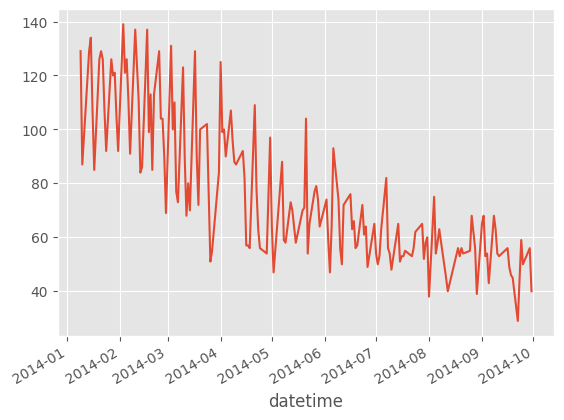

In [19]:
#超単純な折れ線グラフ

df['sales'].plot()

Text(0.5, 1.0, 'Temp. Change')

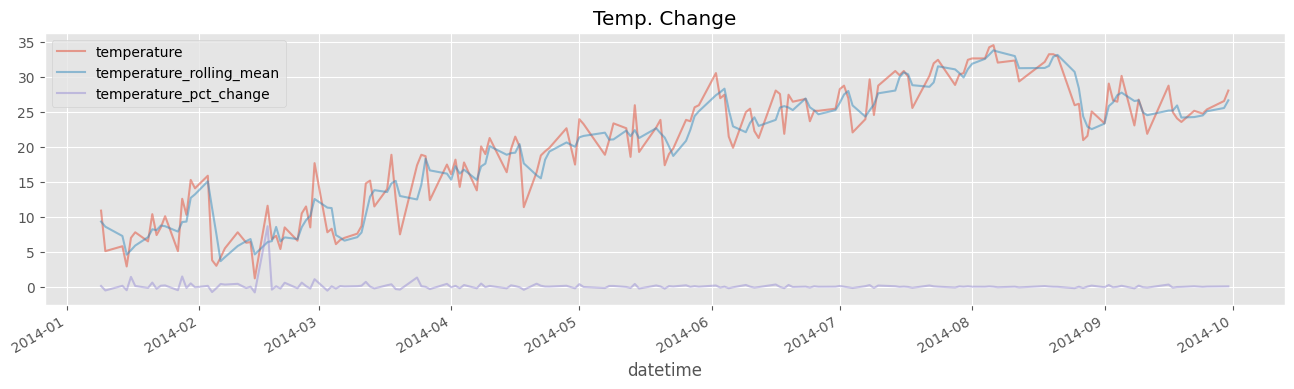

In [22]:
# 少しだけ情報量の多い折れ線グラフ

df.plot(y=['temperature', 'temperature_rolling_mean', 'temperature_pct_change'],  figsize=(16,4), alpha=0.5) # x軸がindexである場合は明記しなくても可
plt.title('Temp. Change')

<AxesSubplot: ylabel='Frequency'>

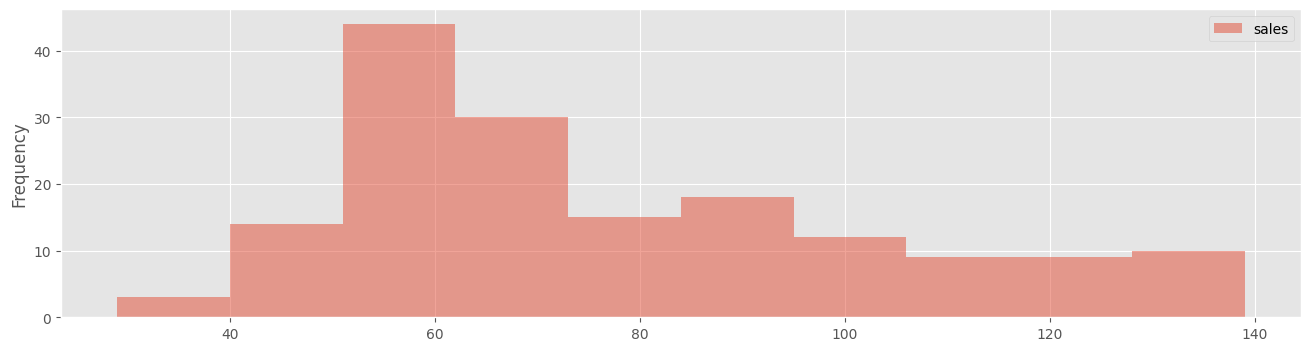

In [25]:
# ヒストグラム

df.plot(kind='hist', y='sales', bins=10, figsize=(16,4), alpha=0.5)

<AxesSubplot: xlabel='kcal', ylabel='sales'>

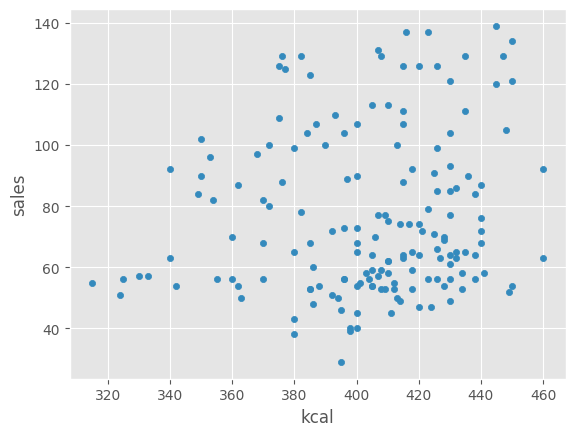

In [26]:
# 散布図

df.plot(kind='scatter', x='kcal', y='sales')

In [27]:
# ちなみに相関係数はcorrメソッドで簡単に表示できる

df[['kcal', 'sales']].corr()

kcal     sales
kcal   1.000000  0.129521
sales  0.129521  1.000000

In [32]:
# ちょっとだけ複雑な集計 例: 月別・期間別の売上個数の状況を可視化したい場合

monthly_df = pd.DataFrame(df.groupby(['month', 'period'])['sales'].sum())
monthly_df.head()

sales
month period       
1     上旬        216
      中旬        581
      下旬       1018
2     上旬        725
      中旬        715

In [33]:
pivot_monthly_df = monthly_df.reset_index().pivot(index='month', columns='period', values='sales')
pivot_monthly_df

period   上旬   中旬    下旬
month                 
1       216  581  1018
2       725  715   609
3       614  698   369
4       792  344   457
5       316  406   517
6       467  440   311
7       460  277   406
8       288  250   334
9       468  249   234

In [39]:
pivot_monthly_df.rename(columns={'上旬': '0<=day<=10', '中旬': '11<=day<=20', '下旬': '21<=day<=31'}, inplace=True)

Text(0.5, 1.0, 'daily and monthly sales')

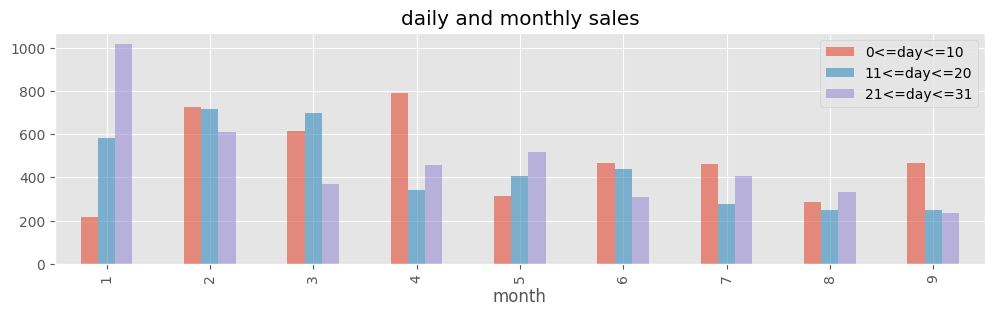

In [40]:
# 棒グラフ

pivot_monthly_df.plot(kind='bar', alpha=0.6, figsize=(12,3)).legend() # legend(prop=font_prop)は日本語表示に必要
plt.title('daily and monthly sales') # fontpropertiesは日本語表示に必要